<a href="https://colab.research.google.com/github/tsvoronos/API202-students/blob/main/section-KP/section2-KP-answers-class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## API-202M ABC SECTION #2
###### TF: Kelsey Pukelis

**I - INSTRUCTIONS**  

1. **Create a copy of this Jupyter notebook in your own drive by clicking `Copy to Drive` in the menubar (this is explained below in more detail below) - *if you do not do this your work will not be saved!***
    1. Remember to save your work frequently by pressing `command-S` or clicking `File > Save` in the menubar.
    1. We recommend completing this in Google Chrome.

## Load `R` libraries and data

**Please refer this [R Cheat Sheet](https://bit.ly/HKS-R) which includes the commands you learned last semester in addition to a number of additional ones.**

The code cell below imports the R tidyverse. Make sure to run it before starting the problem set!

*Note: Click the "play" button that appears when you hover over a cell to run it. The first time you do this you may receive an alert that this notebook was not authored by Google. If so, click "Run anyway" to proceed.*

In [ ]:
library(tidyverse)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.4.0      ✔ purrr   1.0.1 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.3.0      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



# PART I: High School Student Exercise and Grades

The purpose of this exercise is to help you understand multiple regression and omitted variable bias.

The dataset for this question is an extract of data from [a survey of high school students on health behaviors](https://www.cdc.gov/healthyyouth/data/yrbs/data.htm). The variables in this dataset are:

*   `age`: age in years 
*   `exercise`: Number of days exercised during the past 7 days
*   `grades`: reported grades during the last 12 months, where 5 = "Mostly A's" ... 1 = "Mostly F's"
*   `sleep`: "On an average school night, how many hours of sleep do you get?"

Notes about pre-processing just to be aware of:

*   The age variable treats students as age 12 or younger as age 12.
*   The age variable treats students as age 18 or older as age 18.
*   The sleep variable treats less than 4 hours as 4 hours. 
*   The sleep variable treats more than 10 hours as 10 hours. 
*   Students who report their grades are "None of these grades" or "Not sure" are not included in this dataset.
*   I only include students whose data is not missing for all four variables.

In [ ]:
students <- read.csv('https://raw.githubusercontent.com/tsvoronos/API202-students/6c2c5ac7433e47e2d31bee81999da063f221e3b7/data/student_health.csv')
head(students)

,age,sleep,grades,exercise
,<int>,<int>,<int>,<int>
1,16,7,4,4
2,15,7,4,5
3,15,8,4,0
4,15,7,3,0
5,16,5,5,1
6,15,6,4,7


**1. Let's start with plotting a histogram for the `exercise` variable.**

**HINT: the code for a histogram 
is `ggplot(dataset, aes(x = var)) + geom_histogram()`
Where dataset is the name of the dataset and var is the variable of interest.**

In [ ]:
#?geom_histogram
count(students)
nrow(students)

n
<int>
7871


[1] 7871

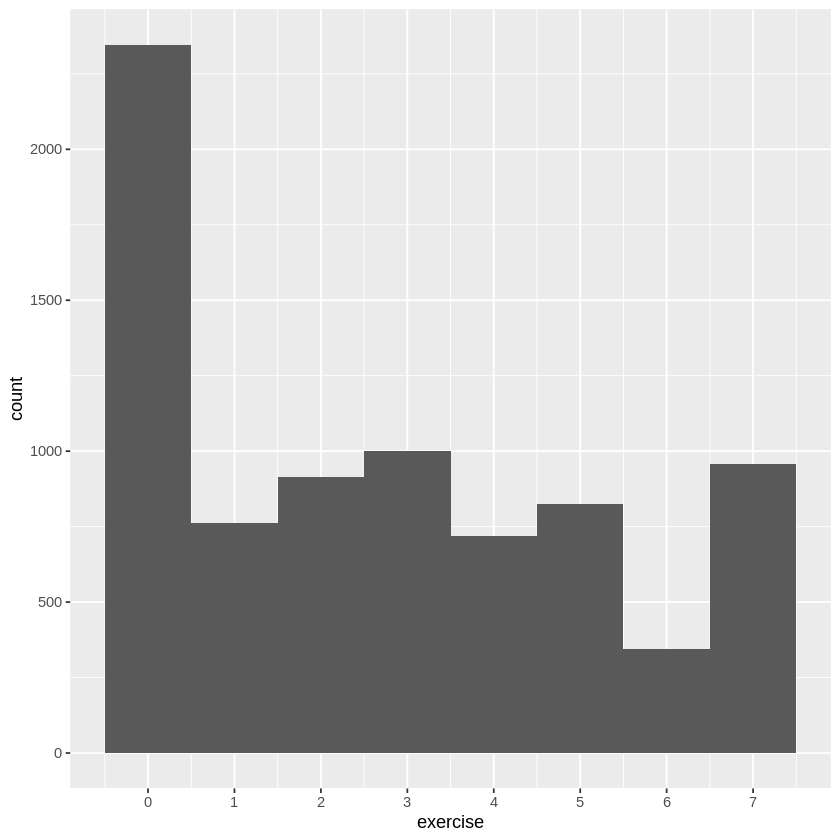

In [ ]:
# Your code here
ggplot(students, aes(x = exercise)) + 
  geom_histogram(binwidth = 1) +
    scale_x_continuous(breaks = 0:7)

**Bonus: Plot a histogram for student grades. Label the values appropriately.**

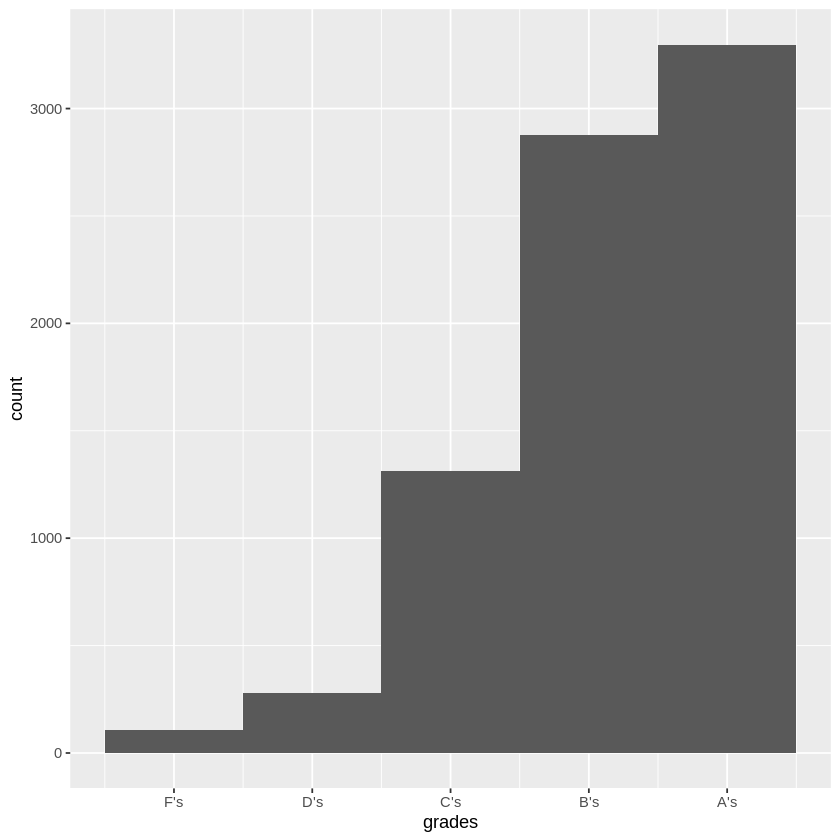

In [ ]:
# Your code here
ggplot(students, aes(x = grades)) + 
  geom_histogram(binwidth = 1) +
    scale_x_continuous(breaks = 1:5,labels = c("F's","D's","C's","B's","A's"))


**2. Using a regression, test the null hypothesis that exercise is not associated with student grades. Discuss the magnitude and statistical significance of your estimate.** 

In [ ]:
# Your code here
regression1 <- lm(grades ~ exercise, data = students)
summary(regression1)


Call:
lm(formula = grades ~ exercise, data = students)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.1853 -0.1853 -0.1124  0.8564  0.8876 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 4.112357   0.015359 267.750   <2e-16 ***
exercise    0.010422   0.004208   2.477   0.0133 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9111 on 7869 degrees of freedom
Multiple R-squared:  0.0007789,	Adjusted R-squared:  0.000652 
F-statistic: 6.134 on 1 and 7869 DF,  p-value: 0.01328


Your answer here



**4. Run a regression of student grades on the `exercise` and `sleep` variables. Interpret each coefficient of the regression, commenting on both magnitude and statistical significance.**

In [ ]:
# Your code here
regression2 <- lm(grades ~ exercise + sleep, data = students)
summary(regression2)


Call:
lm(formula = grades ~ exercise + sleep, data = students)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.5492 -0.3225 -0.0088  0.7961  1.1362 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 3.431464   0.050094  68.500   <2e-16 ***
exercise    0.005266   0.004171   1.263    0.207    
sleep       0.108088   0.007579  14.262   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.8996 on 7868 degrees of freedom
Multiple R-squared:  0.02596,	Adjusted R-squared:  0.02571 
F-statistic: 104.8 on 2 and 7868 DF,  p-value: < 2.2e-16


In [ ]:
regression3 <- lm(sleep ~ exercise, data = students)
summary(regression3)


Call:
lm(formula = sleep ~ exercise, data = students)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.6334 -0.6334 -0.2994  0.7006  3.7006 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  6.29944    0.02256  279.27  < 2e-16 ***
exercise     0.04771    0.00618    7.72 1.31e-14 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.338 on 7869 degrees of freedom
Multiple R-squared:  0.007516,	Adjusted R-squared:  0.00739 
F-statistic: 59.59 on 1 and 7869 DF,  p-value: 1.311e-14


Your answer here


**5. Why do you think the slope coefficient on `exercise` changes as it does between the two regressions? Provide an explanation to a policy maker interested in your results.**

Your answer here

**6. If we fail to include hours of sleep in the regression, then the coefficient on exercise is an ________________ of the true relationship between exercise and student grades.**

Check one:
- [ ] Overstatement
- [ ] Understatement

Your explanation here




**Bonus: See what happens if you add in age to the right hand side of the regressions. Comment on what happens to the regression coefficients.**

In [ ]:
# Your code here
regression4 <- lm(grades ~ exercise + sleep + age, data = students)
summary(regression4)


Call:
lm(formula = grades ~ exercise + sleep + age, data = students)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.5706 -0.3235 -0.0223  0.7967  1.1589 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.658526   0.149018  24.551   <2e-16 ***
exercise     0.005085   0.004172   1.219    0.223    
sleep        0.106626   0.007632  13.971   <2e-16 ***
age         -0.013552   0.008377  -1.618    0.106    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.8995 on 7867 degrees of freedom
Multiple R-squared:  0.02628,	Adjusted R-squared:  0.02591 
F-statistic: 70.78 on 3 and 7867 DF,  p-value: < 2.2e-16


**7. The outputs from the regressions are usually presented as well-formatted tables. In this question, you will learn how to nicely format a table with the results from multiple regressions.**

**First, run the script below installing the package modelsummary (this may take a minute or so to install).**

In [ ]:
check_installed <- require(modelsummary)
if(check_installed==F){
  install.packages("modelsummary")
  require(modelsummary)
}

Loading required package: modelsummary

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘modelsummary’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘webshot’, ‘bayestestR’, ‘datawizard’, ‘checkmate’, ‘insight’, ‘kableExtra’, ‘parameters’, ‘performance’, ‘tables’


Loading required package: modelsummary



**8. Next, include the results of the regressions you run in this exercise in a nicely formatted table using the existing code below to get started**

In the code snippet below, `fit1`, `fit2`, and `fit3` is the regression outputs you saved in previous code, `Name of Outcome Variable` is what you would like to show up on the top of each column, and `var1` and `var2` are the name of two independent variables included in the regression (e.g., exercise). Note that you can and should include all the variables that you used in the models you ran in the `coef_map` line.
```
  modelsummary(list("Name Outcome Variable" = fit1,"Name Outcome Variable" = fit2, "Name Outcome Variable" = fit3),
  stars=T,
  coef_map = c("(Intercept)" = "Constant","var1" = "Name of var1", "var2" = "Name of var2"),
 title = "Add Here the Title of the Table",
  gof_omit = 'IC|Log',
  output="jupyter")

  ```

In [ ]:
# Your answer here
  modelsummary(list("Grades" = regression1,"Grades" = regression2, "Grades" = regression4),
  stars=T,
  coef_map = c("exercise" = "Days of exercise per week",
              "sleep" = "Typical hours of sleep",
              "age" = "Age",
              "(Intercept)" = "Constant"),
 title = "Student grades and health behaviors",
  gof_omit = 'IC|Log',
  output="jupyter")

,Grades,Grades,Grades
Days of exercise per week,0.010*,0.005,0.005
,(0.004),(0.004),(0.004)
Typical hours of sleep,,0.108***,0.107***
,,(0.008),(0.008)
Age,,,−0.014
,,,(0.008)
Constant,4.112***,3.431***,3.659***
,(0.015),(0.050),(0.149)
Num.Obs.,7871,7871,7871
R2,0.001,0.026,0.026


**11. Now compare the R-squared in the different columns of the Table you created in the previous Question. What do you observe?**

Your explanation here


# PART II: College quality and future earnings



See the handout posted on Canvas.